In [1]:
# Database Connection
import sqlalchemy
from sqlalchemy import create_engine, inspect, text

# Data Science
import pandas as pd
import numpy as np

# Data Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

# to enable visulization
from sqlalchemy import create_engine, text


In [2]:
# Assign SQL variables
SQL_USERNAME = "postgres"
SQL_PASSWORD = "Dasani595!"
SQL_IP = "localhost"
PORT = 5432
DATABASE = "project_two_etl"

In [3]:
# Set up Engine
connection_string = f"postgresql+psycopg2://{SQL_USERNAME}:{SQL_PASSWORD}@{SQL_IP}:{PORT}/{DATABASE}"
engine = create_engine(connection_string)

In [4]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Use the inspector to print the column names within each table and its data types
for table in tables:
    print(table)
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])
        
    print()

contacts
contact_id INTEGER
first_name VARCHAR(100)
last_name VARCHAR(250)
email VARCHAR(250)
last_updated TIMESTAMP

campaign
cf_id INTEGER
contact_id INTEGER
company_name VARCHAR(100)
description VARCHAR(500)
goal INTEGER
pledged INTEGER
outcome VARCHAR(100)
backers_count INTEGER
country VARCHAR(5)
currency VARCHAR(5)
launched_date DATE
end_date DATE
category_id VARCHAR(5)
subcategory_id VARCHAR(100)
last_updated TIMESTAMP

category
category_id VARCHAR(5)
category VARCHAR(100)
last_updated TIMESTAMP

subcategory
subcategory_id VARCHAR(8)
subcategory VARCHAR(100)
last_updated TIMESTAMP



In [5]:
# Retrieve full contacts table from Postgres
query = """
    SELECT *
    FROM contacts
    """
contacts = pd.read_sql(text(query), con=engine)
contacts.head()

,contact_id,first_name,last_name,email,last_updated
0,4661,Cecilia,Velasco,cecilia.velasco@rodrigues.fr,2024-07-16 20:14:01.661561
1,3765,Mariana,Ellis,mariana.ellis@rossi.org,2024-07-16 20:14:01.661561
2,4187,Sofie,Woods,sofie.woods@riviere.com,2024-07-16 20:14:01.661561
3,4941,Jeanette,Iannotti,jeanette.iannotti@yahoo.com,2024-07-16 20:14:01.661561
4,2199,Samuel,Sorgatz,samuel.sorgatz@gmail.com,2024-07-16 20:14:01.661561


In [6]:
# Query for 'US'
query = """
    SELECT
        cat.category,
        cam.outcome,
        COUNT(cam.outcome) AS count,
        cam.country,
        cam.launched_date,
        cam.end_date
        
    FROM campaign AS cam
    JOIN category AS cat ON (cam.category_id = cat.category_id)
    WHERE cam.outcome IN ('successful', 'failed')
        AND cam.country = 'US'
    GROUP BY cat.category, cam.outcome, cam.country, cam.launched_date, cam.end_date
    ORDER BY cat.category, cam.outcome DESC;
    """
question_3us = pd.read_sql(text(query), con=engine)
question_3us.head()

,category,outcome,count,country,launched_date,end_date
0,film & video,successful,6,US,2020-02-01,2021-02-08
1,film & video,successful,6,US,2020-03-03,2021-03-10
2,film & video,successful,6,US,2020-03-21,2021-05-13
3,film & video,successful,6,US,2020-03-28,2021-03-08
4,film & video,successful,6,US,2020-04-12,2021-03-24


In [7]:
question_3us['campaign_length'] = (question_3us['end_date'] - question_3us['launched_date'])
question_3us.dtypes

category           object
outcome            object
count               int64
country            object
launched_date      object
end_date           object
campaign_length    object
dtype: object

In [8]:
# Retrieve full category table from Postgres
query = """
    SELECT *
    FROM category
    """
category = pd.read_sql(text(query), con=engine)
category.head()

,category_id,category,last_updated
0,cat1,food,2024-07-16 20:14:01.733375
1,cat2,music,2024-07-16 20:14:01.733375
2,cat3,technology,2024-07-16 20:14:01.733375
3,cat4,theater,2024-07-16 20:14:01.733375
4,cat5,film & video,2024-07-16 20:14:01.733375


In [9]:
# Retrieve full subcategory table from Postgres
query = """
    SELECT *
    FROM subcategory
    """
subcategory = pd.read_sql(text(query), con=engine)
subcategory.head()

,subcategory_id,subcategory,last_updated
0,subcat1,food trucks,2024-07-16 20:14:01.750587
1,subcat2,rock,2024-07-16 20:14:01.750587
2,subcat3,web,2024-07-16 20:14:01.750587
3,subcat4,plays,2024-07-16 20:14:01.750587
4,subcat5,documentary,2024-07-16 20:14:01.750587


In [10]:
# Retrieve full campaign table from Postgres
query = """
    SELECT *
    FROM campaign
    """

campaign = pd.read_sql(text(query), con=engine)
campaign.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,category_id,subcategory_id,last_updated
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,2020-02-13,2021-03-01,cat1,subcat1,2024-07-16 21:30:47.441202
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,2021-01-25,2021-05-25,cat2,subcat2,2024-07-16 21:30:47.441202
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,2020-12-17,2021-12-30,cat3,subcat3,2024-07-16 21:30:47.441202
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,2021-10-21,2022-01-17,cat2,subcat2,2024-07-16 21:30:47.441202
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,2020-12-21,2021-08-23,cat4,subcat4,2024-07-16 21:30:47.441202


In [25]:
# Calculate the length of the campaign in days
campaign['campaign_length'] = (campaign['end_date'] - campaign['launched_date'])
campaign.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,category_id,subcategory_id,last_updated,campaign_length
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,2020-02-13,2021-03-01,cat1,subcat1,2024-07-16 21:30:47.441202,"382 days, 0:00:00"
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,2021-01-25,2021-05-25,cat2,subcat2,2024-07-16 21:30:47.441202,"120 days, 0:00:00"
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,2020-12-17,2021-12-30,cat3,subcat3,2024-07-16 21:30:47.441202,"378 days, 0:00:00"
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,2021-10-21,2022-01-17,cat2,subcat2,2024-07-16 21:30:47.441202,"88 days, 0:00:00"
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,2020-12-21,2021-08-23,cat4,subcat4,2024-07-16 21:30:47.441202,"245 days, 0:00:00"


In [14]:
# Retrieve full campaign table from Postgres
query = """
    SELECT *
    FROM campaign
    """
campaign = pd.read_sql(text(query), con=engine)
campaign.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,category_id,subcategory_id,last_updated
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,2020-02-13,2021-03-01,cat1,subcat1,2024-07-16 21:30:47.441202
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,2021-01-25,2021-05-25,cat2,subcat2,2024-07-16 21:30:47.441202
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,2020-12-17,2021-12-30,cat3,subcat3,2024-07-16 21:30:47.441202
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,2021-10-21,2022-01-17,cat2,subcat2,2024-07-16 21:30:47.441202
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,2020-12-21,2021-08-23,cat4,subcat4,2024-07-16 21:30:47.441202


In [15]:
# Query for 'all countries'
query = """
    SELECT 
        cf_id,
        country,
        outcome,
        COUNT(outcome) AS count,
        launched_date,
        end_date
    FROM campaign
    WHERE outcome IN ('successful', 'failed')
        AND country IN ('US', 'CA', 'CH', 'AU')
    GROUP BY cf_id, country, outcome, launched_date, end_date
    ORDER BY country, outcome DESC;
    """
question3all = pd.read_sql(text(query), con=engine)
question3all.head(10)

,cf_id,country,outcome,count,launched_date,end_date
0,1338,AU,successful,6,2021-04-14,2021-05-30
1,1060,AU,successful,6,2021-06-06,2021-07-21
2,1717,AU,successful,6,2020-11-03,2021-08-02
3,2181,AU,successful,6,2021-05-29,2021-08-20
4,2280,AU,successful,6,2020-11-16,2021-09-14
5,2497,AU,successful,6,2021-01-17,2021-07-23
6,2339,AU,successful,6,2021-02-25,2021-05-07
7,1935,AU,successful,6,2020-09-30,2021-03-29
8,1159,AU,successful,6,2020-08-11,2021-09-07
9,2563,AU,successful,6,2020-10-09,2021-06-06


In [16]:
# Recast Date columns
question3all.launched_date = pd.to_datetime(question3all.launched_date)
question3all.end_date = pd.to_datetime(question3all.end_date)
question3all.dtypes

cf_id                     int64
country                  object
outcome                  object
count                     int64
launched_date    datetime64[ns]
end_date         datetime64[ns]
dtype: object

In [17]:
# Add column for count of days
question3all['campaign_length'] = (question3all.end_date - question3all.launched_date).dt.days
question3all.head()

,cf_id,country,outcome,count,launched_date,end_date,campaign_length
0,1338,AU,successful,6,2021-04-14,2021-05-30,46
1,1060,AU,successful,6,2021-06-06,2021-07-21,45
2,1717,AU,successful,6,2020-11-03,2021-08-02,272
3,2181,AU,successful,6,2021-05-29,2021-08-20,83
4,2280,AU,successful,6,2020-11-16,2021-09-14,302


In [46]:
# Divide Dataframe by country
question3us = question3all.loc[question3all.country == 'US']
question3ca = question3all.loc[question3all.country == 'CA']
question3ch = question3all.loc[question3all.country == 'CH']
question3au = question3all.loc[question3all.country == 'AU']

# Suggested to divide by success/failures
successful_us = question3us[question3us['outcome'] == 'successful']
failed_us = question3us[question3us['outcome'] == 'failed']
successful_ca = question3ca[question3ca['outcome'] == 'successful']
failed_ca = question3ca[question3ca['outcome'] == 'failed']
successful_ch = question3ch[question3ch['outcome'] == 'successful']
failed_ch = question3ch[question3ch['outcome'] == 'failed']
successful_au = question3au[question3au['outcome'] == 'successful']
failed_au = question3au[question3au['outcome'] == 'failed']

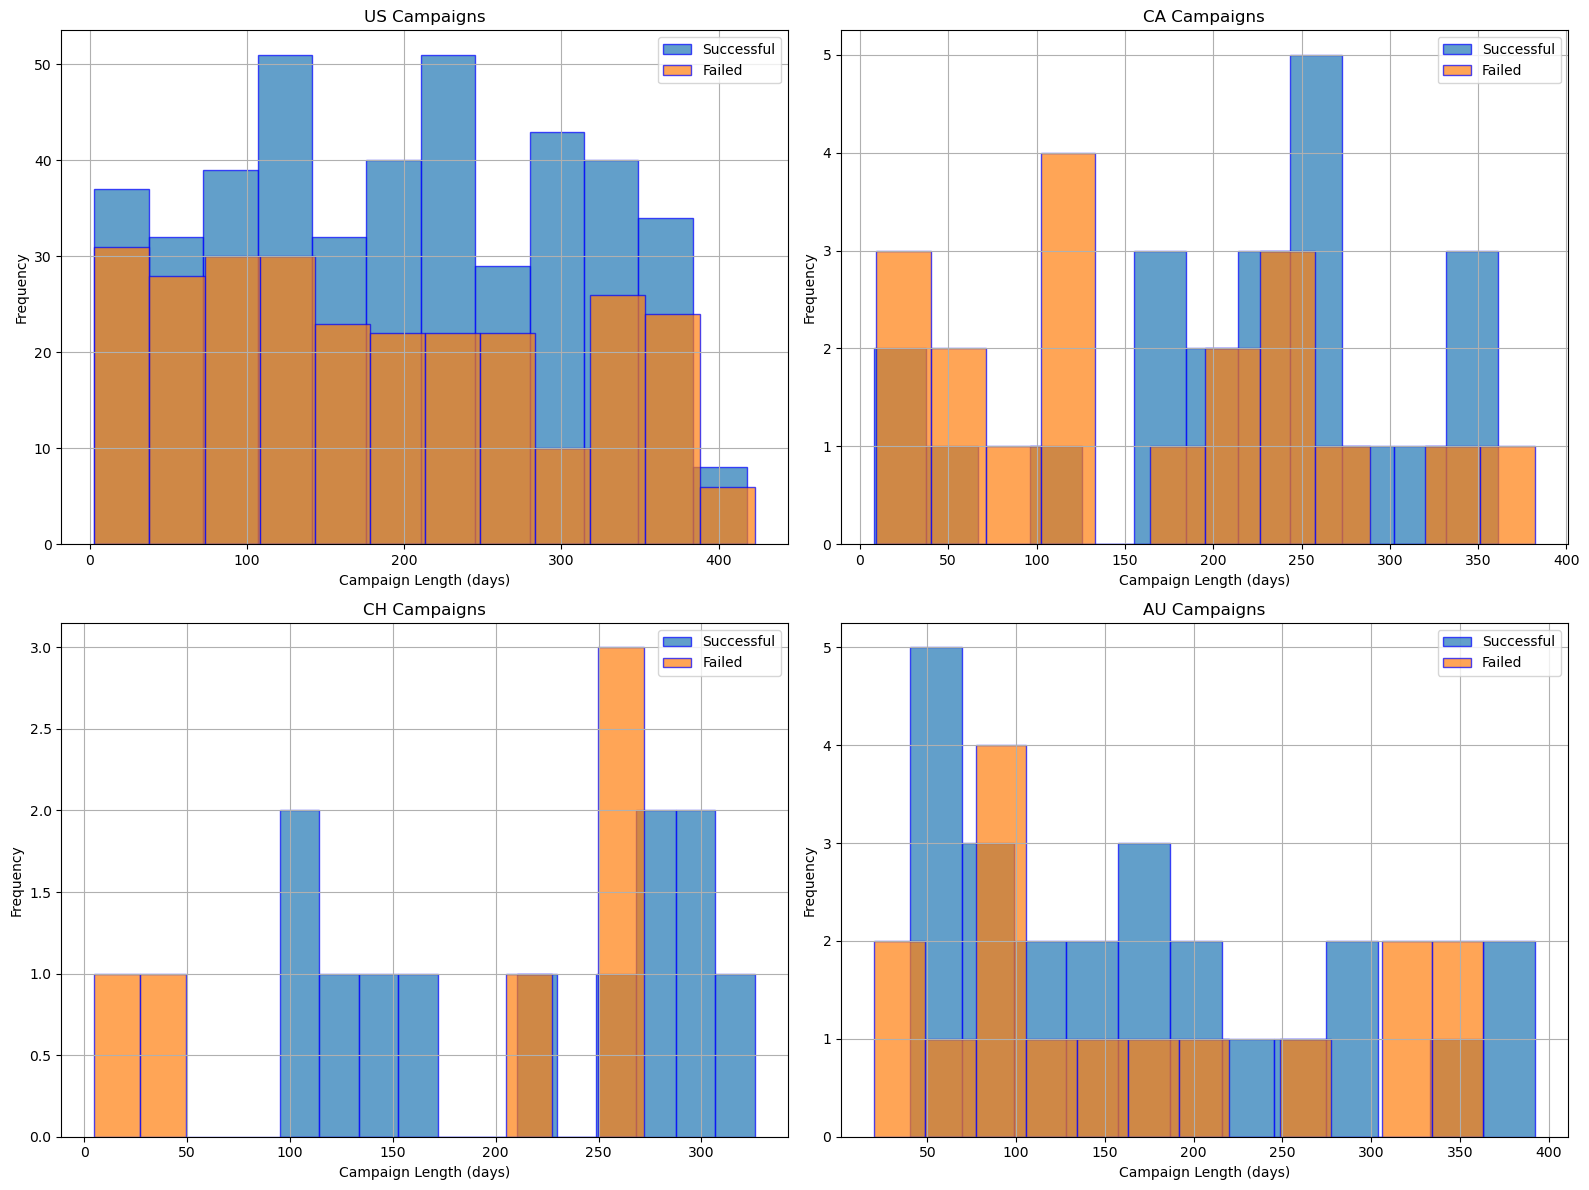

In [47]:
# Plotting histograms in subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot for US campaigns
axs[0, 0].hist(successful_us['campaign_length'], bins=12, edgecolor='blue', alpha=0.7, label='Successful')
axs[0, 0].hist(failed_us['campaign_length'], bins=12, edgecolor='blue', alpha=0.7, label='Failed')
axs[0, 0].set_xlabel('Campaign Length (days)')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('US Campaigns')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot for CA campaigns
axs[0, 1].hist(successful_ca['campaign_length'], bins=12, edgecolor='blue', alpha=0.7, label='Successful')
axs[0, 1].hist(failed_ca['campaign_length'], bins=12, edgecolor='blue', alpha=0.7, label='Failed')
axs[0, 1].set_xlabel('Campaign Length (days)')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('CA Campaigns')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot for CH campaigns
axs[1, 0].hist(successful_ch['campaign_length'], bins=12, edgecolor='blue', alpha=0.7, label='Successful')
axs[1, 0].hist(failed_ch['campaign_length'], bins=12, edgecolor='blue', alpha=0.7, label='Failed')
axs[1, 0].set_xlabel('Campaign Length (days)')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('CH Campaigns')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot for AU campaigns
axs[1, 1].hist(successful_au['campaign_length'], bins=12, edgecolor='blue', alpha=0.7, label='Successful')
axs[1, 1].hist(failed_au['campaign_length'], bins=12, edgecolor='blue', alpha=0.7, label='Failed')
axs[1, 1].set_xlabel('Campaign Length (days)')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('AU Campaigns')
axs[1, 1].legend()
axs[1, 1].grid(True)

# Save to chart folder
plt.savefig('../Charts/chart_all.png', bbox_inches='tight')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [12]:
# Close Connection
engine.dispose()